### Analytical and Numerical Solutions with R to Linear Regression Problems

This is the first programming exercise in the coursera machine learning course offered by Andrew Ng. The course is offered with Matlab/Octave. Since R is the lingafranka data science tool, I plan to do all the programming exercises in Andrew's course with R. Last time, I [posted](http://datascience-enthusiast.com/R/anomaly_detection_R.html) the R version of the anomaly detecion excercise. This exercise focuses on linear regression with both analytical (normal equation) and numerical (gradient descent) methods.

The exercise starts with linear regression with one variable. From this part of the exercise, we will create plots that help to visualize how gradient descent gets the coeffient of the predictor and the intercept.  

###  Linear regression with one variable

In this part of this exercise, we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from cities.
We would like to use this data to help us select which city to expand to next.

The file  <a href="ex1data1.txt">ex1data1.txt</a> contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.  The first column refers to the population size in 10,000s and the second column refers to the profit in $10,000s

In [2]:
library(ggplot2)
library(data.table)
library(magrittr)
library(caret)
library(fields)
library(plot3D)

##### Load the data and display first 6 observations

In [3]:
ex1data1 <- fread("ex1data1.txt",col.names=c("population","profit"))    
head(ex1data1)  

population,profit
6.1101,17.5920
5.5277,9.1302
8.5186,13.6620
7.0032,11.8540
5.8598,6.8233
8.3829,11.8860


#### Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that we encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.

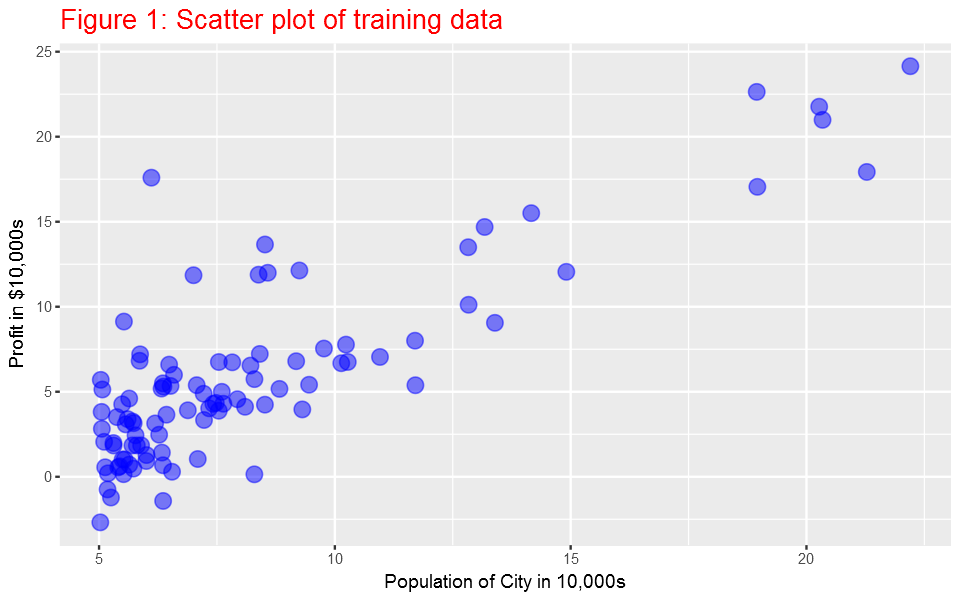

In [8]:
ex1data1%>%ggplot(aes(x=population, y=profit))+
geom_point(color="blue",size=4,alpha=0.5)+
ylab('Profit in $10,000s')+          
xlab('Population of City in 10,000s')+ggtitle ('Figure 1: Scatter plot of training data')+
theme(plot.title = element_text(size = 16,colour="red"))

#### Gradient Descent

In this part, we will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

To impliment gradient descent, we need to calculate the cost, which is given by:


$$J(\theta)=\frac{1}{2m} \sum\limits_{i=1}^{m}( h_\theta(x^{(i)})-y^{(i)})^2$$  
where the hypothesis $h_\theta(x) $ is given by the linear model

$$h_\theta(x)=\theta^TX=\theta_0+\theta_1x1$$ when we have one variable and 
$$h_\theta(x)=\theta^TX=\theta_0+\theta_1x1 + ...+\theta_nx_n$$ when we have n variables (features).

The parameters of our model are the $\theta_j$ values. These are
the values we will adjust to minimize cost J($\theta$). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update


$$\theta_j:=\theta_j-\alpha\frac{1}{2m}\sum\limits_{i=1}^{m}( h_\theta(x^{(i)})-y^{(i)})x_j^i$$  (simultaneously update $\theta_j$ for all j)

With each step of gradient descent, our parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

#### Computing the cost J($\theta$)

As we perform gradient descent to learn minimize the cost function J($\theta$), it is helpful to monitor the convergence by computing the cost. In this section, we will implement a function to calculate J($\theta$) so we can check the convergence of our gradient descent implementation.

But remember, before we go any further we need to add the $\theta_0$ intercept term.

In [4]:
X=cbind(1,ex1data1$population)
y=ex1data1$profit
head(X)

1,6.1101
1,5.5277
1,8.5186
1,7.0032
1,5.8598
1,8.3829


The function below calcuates cost based on the equation given above.

In [7]:
computeCost=function(X,y,theta){
    z=((X%*%theta)-y)^2
    return(sum(z)/(2*nrow(X)))
}

Now, we can calculate the initial cost by initilizating the initial parameters to 0.

In [8]:
theta=matrix(rep(0,ncol(X)))

In [9]:
round(computeCost(X,y,theta),2)

[1] 32.07

#### Gradient descent

Next, we will implement gradianent descent by calling the **computeCost** function above. A good way to verify that gradient descent is working correctly is to look at the value of J($\theta$) and check that it is decreasing with each step. Our value of J($\theta$) should never increase, and should
converge to a steady value by the end of the algorithm.

The gradient descent function below returns the cost in every iteration and the optimal paramets for the number of iterations and learning rate **alpha** specified.

In [12]:
gradientDescent=function(X, y, theta, alpha, iters){

gd=list()
cost=rep(0,iters)
    
for(k in 1:iters){
  z=rep(0,ncol(X))
  for(i in 1:ncol(X)){
      for(j in 1:nrow(X)){
          z[i]=z[i]+(((X[j,]%*%theta)-y[j])*X[j,i])
          }
      }
    
theta= theta-((alpha/nrow(X))*z)
cost[k]=computeCost(X,y,theta)
    }
    
    gd$theta= theta
    gd$cost=cost
    gd 
}

Now, let's use the **gradientDescent** function to find the paramets and we have to make sure that our cost never increases. Let's use 1500 iterations and a learning rate alpha of 0.04 for now. Later, we will see the effect of these values in our application.

In [13]:
iterations = 1500
alpha = 0.01
theta= matrix(rep(0, ncol(X)))

gradientDescent_results=gradientDescent(X,y,theta,alpha,iterations)

theta=gradientDescent_results$theta
theta

-3.630291
1.166362


#### Ploting the cost function as a function of the number of iterations

We expect that the cost should be decreasing or at least should not be at all increasing if our implementaion is correct. Let's plot the cost fucntion as a function of number of iterations and make sure our implemenation makes sense.

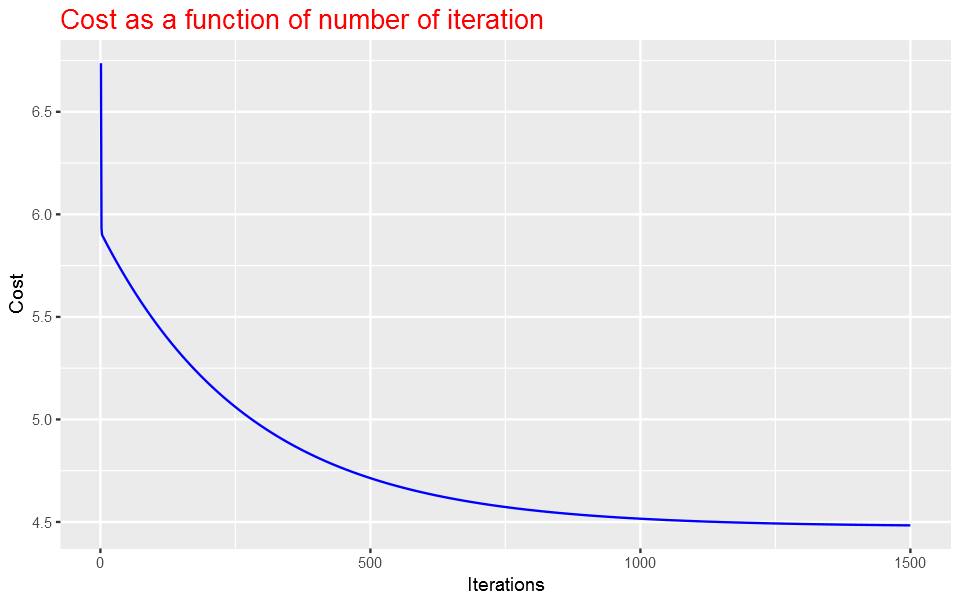

In [16]:
data.frame(Cost=gradientDescent_results$cost,Iterations=1:iterations)%>%
ggplot(aes(x=Iterations,y=Cost))+geom_line(color="blue")+
ggtitle("Cost as a function of number of iteration")+
theme(plot.title = element_text(size = 16,colour="red"))

As the plot above shows, the cost decrases with number of iterations and gets almost close to convergence with 1500 iterations.

#### Plot the linear fit

Now, since we know the parameters (slope and intercept), we can plot the linear fit on the scatter plot.

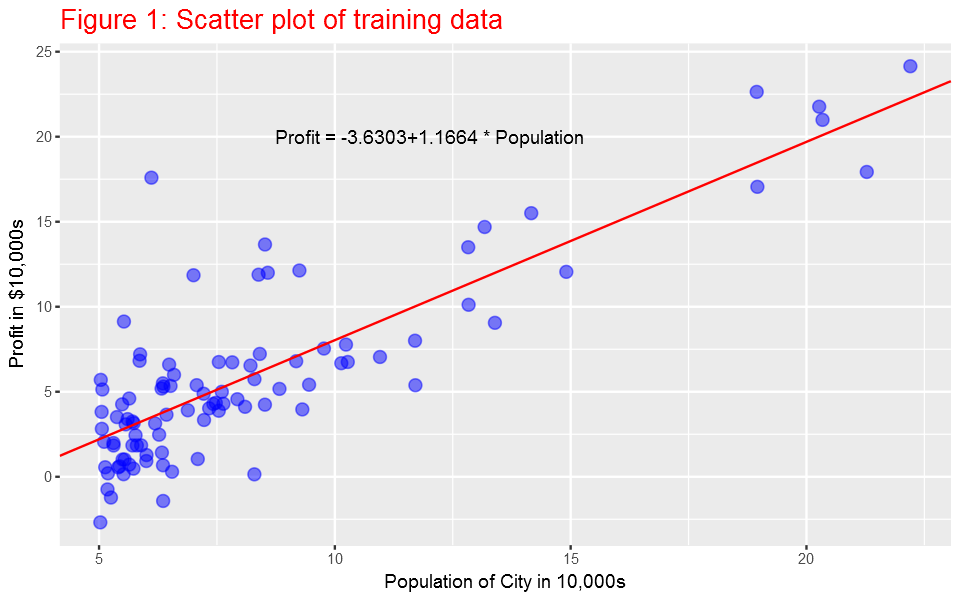

In [17]:
ex1data1%>%ggplot(aes(x=population, y=profit))+
geom_point(color="blue",size=3,alpha=0.5)+
ylab('Profit in $10,000s')+          
xlab('Population of City in 10,000s')+
ggtitle ('Figure 1: Scatter plot of training data') +
geom_abline(intercept = theta[1], slope = theta[2],col="red",show.legend=TRUE)+
theme(plot.title = element_text(size = 16,colour="red"))+
annotate("text", x = 12, y = 20, label = paste0("Profit = ",round(theta[1],4),"+",round(theta[2],4)," * Population"))

#### Visualizing J($\theta$)

To understand the cost function J($\theta$) better, let's now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.  The global minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of
gradient descent moves closer to this point.

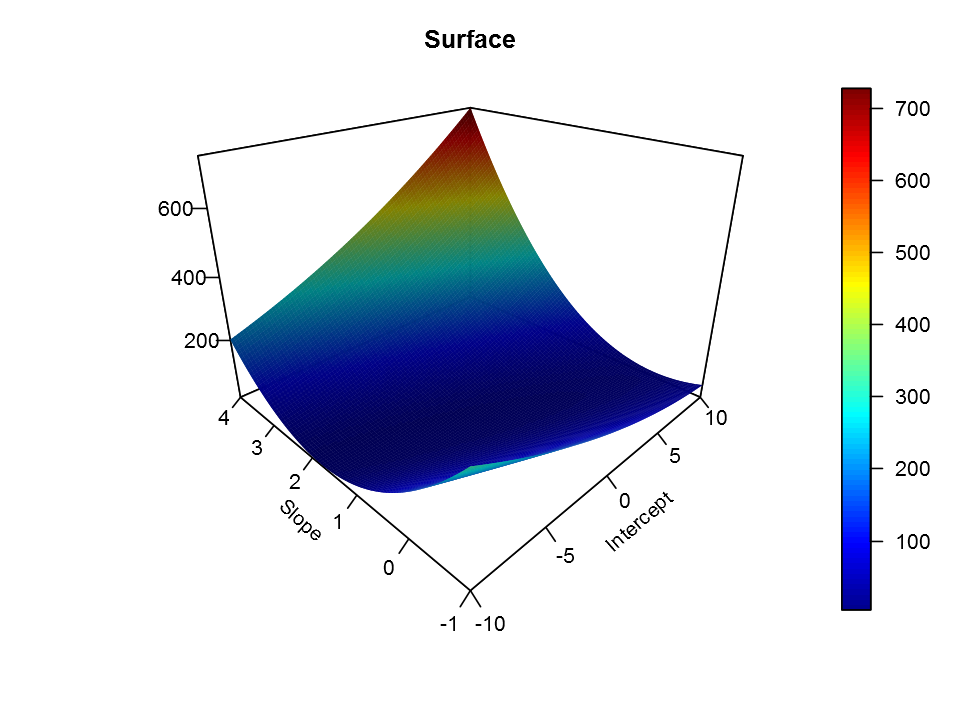

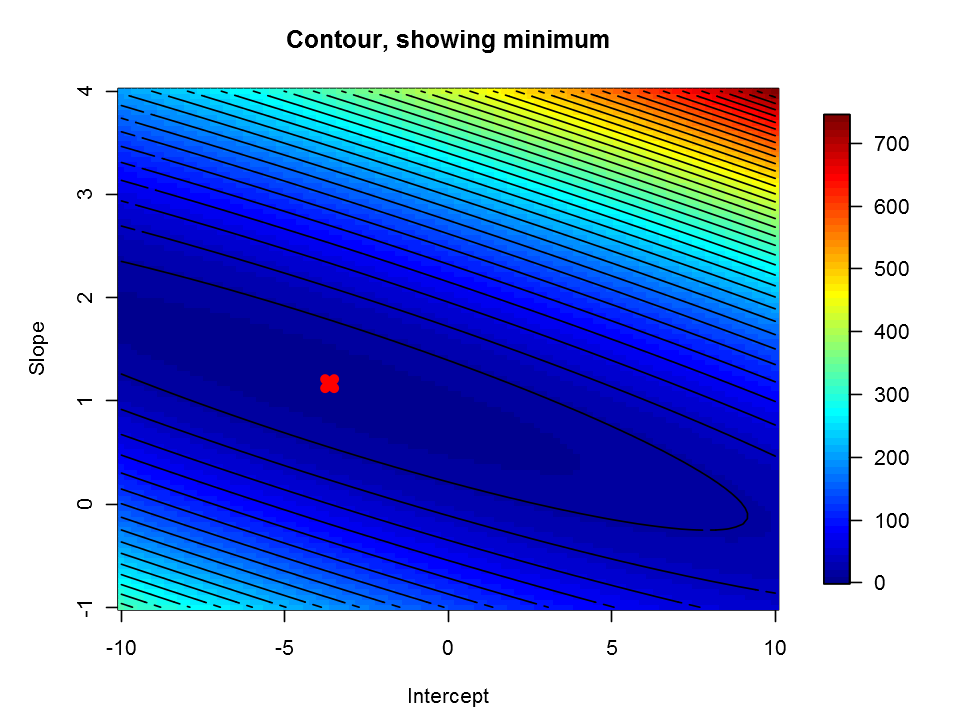

In [21]:
Intercept=seq(from=-10,to=10,length=100)
Slope=seq(from=-1,to=4,length=100)

# initialize cost values to a matrix of 0's
Cost = matrix(0,length(Intercept), length(Slope));

for(i in 1:length(Intercept)){
    for(j in 1:length(Slope)){
        t = c(Intercept[i],Slope[j])
        Cost[i,j]= computeCost(X, y, t)
    }
}

persp3D(Intercept,Slope,Cost,theta=-45, phi=25, expand=0.75,lighting = TRUE,
        ticktype="detailed", xlab="Intercept", ylab="Slope",
        zlab="",axes=TRUE, main="Surface")



image.plot(Intercept,Slope,Cost, main="Contour, showing minimum")
contour(Intercept,Slope,Cost, add = TRUE,n=30,labels='')
points(theta[1],theta[2],col='red',pch=4,lwd=6)

#### Normal Equation

Since linear regression has closed-form solution, we can solve it analytically and it is called normal equation. It is given by the formula below. we do not need to iterate or choose learning curve. However, we need to calcuate  $(X^TX)^{-1}$, which make it slow if the number of records is very large. Gradient descent is applicable to other machine learning techniques as well. Further, gradient descent method is more appropriate even to linear regression when the number of observations is very large.

$\theta=(X^TX)^{-1}X^Ty$

In [22]:
theta2=solve((t(X)%*%X))%*%t(X)%*%y
theta2

-3.895781
1.193034


The parameters we got from gradient descent are:

In [23]:
theta

-3.630291
1.166362


There is very small difference between the parameters we got from normal equation and using gradient descent. Let's increase the number of iteration and see if they get closer to each other. I increased the number of iterations from 1500 to 15000.

In [52]:
iterations = 15000
alpha = 0.01
theta= matrix(rep(0, ncol(X)))

gradientDescent_results=gradientDescent(X,y,theta,alpha,iterations)

theta=gradientDescent_results$theta
theta

-3.895781
1.193034


As you can see, now the results from normal equation and gradient descent are the same.

#### Using caret package

By the way, we can use packages develoed by experts in the field and perform our machine learning tasks. There are many machine learning packages in R for differnt types of machine learning tasks. To verify that we get the same results, let's use the **caret** package, which is among the most commonly used machine learning packages in R.

In [25]:
my_lm <- train(profit~population, data=ex1data1,method = "lm")
my_lm$finalModel$coefficients

(Intercept)  population 
  -3.895781    1.193034

**painless!!**

<br/>

### Linear regression with multiple variables

In this part of the exercise, we will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing
prices.
The filele <a href="ex1data2.txt">ex1data2.txt</a> contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [32]:
ex1data2 <- fread("ex1data2.txt",col.names=c("size","bedrooms","price"))    
head(ex1data2)

size,bedrooms,price
2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900


###### Feature Normalization

House sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [33]:
ex1data2=as.data.frame(ex1data2)
class(ex1data2)
for(i in 1:(ncol(ex1data2)-1)){
    ex1data2[,i]=(ex1data2[,i]-mean(ex1data2[,i]))/sd(ex1data2[,i])
}

[1] "data.frame"

In [34]:
round(apply(ex1data2,2,mean),10)

size bedrooms    price 
     0.0      0.0 340412.7

In [35]:
apply(ex1data2,2,sd)

size bedrooms    price 
     1.0      1.0 125039.9

#### Gradient Descent

Previously, we implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in the
matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged.

In [36]:
X=cbind(1,ex1data2$size,ex1data2$bedrooms)
y=ex1data2$price
head(X)

1,0.13000987,-0.2236752
1,-0.50418984,-0.2236752
1,0.50247636,-0.2236752
1,-0.73572306,-1.5377669
1,1.25747602,1.0904165
1,-0.01973173,1.0904165


In [40]:
iterations = 6000
alpha = 0.01
theta= matrix(rep(0, ncol(X)))

gradientDescent_results=gradientDescent(X,y,theta,alpha,iterations)

theta=gradientDescent_results$theta
theta

340412.660
110631.050
-6649.474


#### Normal Equation

In [41]:
theta2=solve((t(X)%*%X))%*%t(X)%*%y
theta2

340412.660
110631.050
-6649.474


#### Using caret package

In [42]:
ex1data2 <- fread("ex1data2.txt",col.names=c("size","bedrooms","price"))    

my_lm <- train(price~size+bedrooms, data=ex1data2,method = "lm", 
               preProcess = c("center","scale"))
my_lm$finalModel$coefficients

(Intercept)        size    bedrooms 
 340412.660  110631.050   -6649.474

#### Summary

In this post, we saw how to implement numerical and analytical solutions to linear regression problems using R. We also used caret- the famous R machine learning package, to verify our results. 